In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import string
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/DS_AND_ML/NLP/social_media_clean_text.csv", encoding='latin')

In [ ]:
data.count()

text           9282
choose_one     9282
class_label    9282
dtype: int64

In [ ]:
data.shape

(9282, 3)

In [ ]:
data.head()

,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this earthquake m...,Relevant,1
2,"heard about earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,forest fire near la ronge sask canada,Relevant,1


In [ ]:
data['choose_one'].value_counts()/len(data)

choose_one
Not Relevant    0.581340
Relevant        0.417367
Can't Decide    0.001293
Name: count, dtype: float64

hyper parameter tuning


In [ ]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters, numbers, and punctuations (except for hashtags and @mentions)
    text = re.sub("[^a-zA-Z#@]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    exclude =string.punctuation
    words = [word for word in words if word not in exclude]

    # Lemmatize words based on POS tags
    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(words)
    lemmatized_words = []
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        elif tag.startswith('JJ'):  # Adjective
            pos = 'a'
        else:
            pos = 'n'  # Default to noun
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))
    text = ' '.join(lemmatized_words)
    return text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data['text'] = data['text'].apply(preprocess_text)

In [ ]:
data['class_label']

0       1
1       1
2       1
3       1
4       1
       ..
9277    1
9278    1
9279    1
9280    1
9281    1
Name: class_label, Length: 9282, dtype: int64

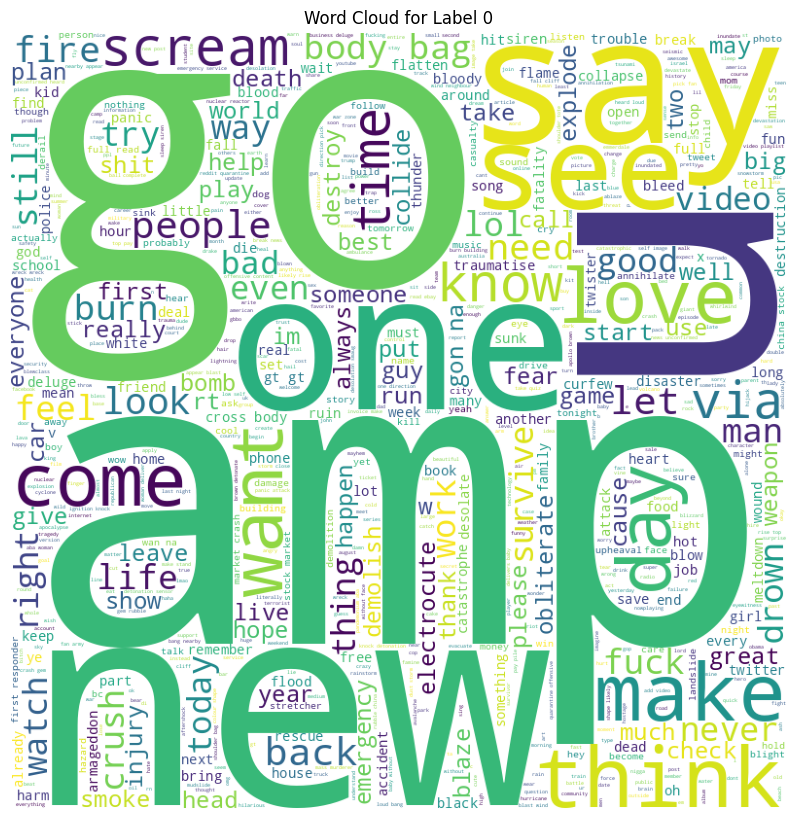

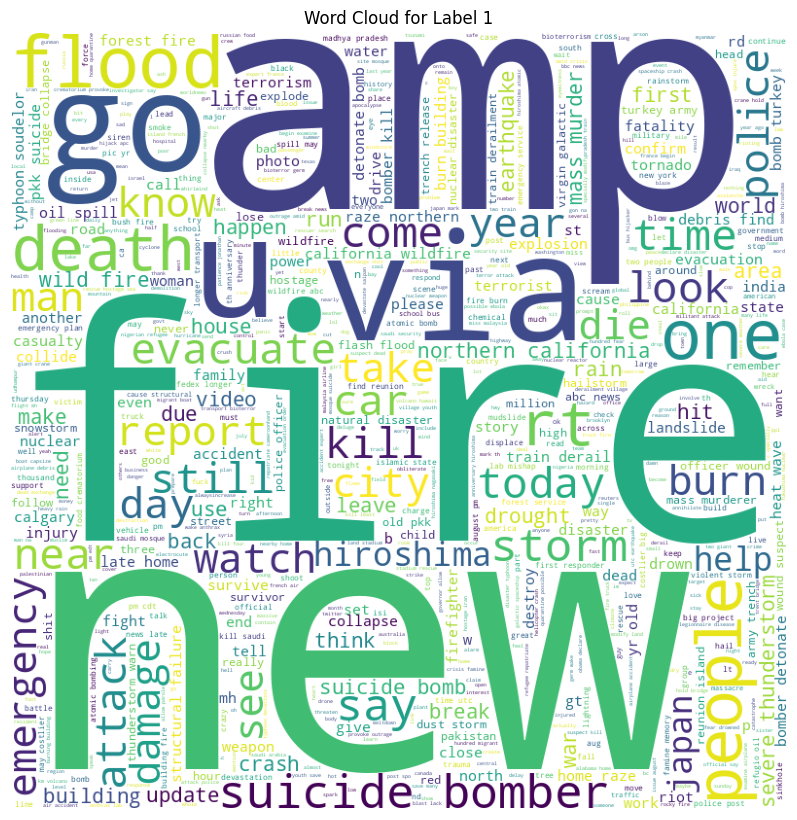

In [ ]:

text_label_0 = ' '.join(data[data['class_label'] == 0]['text'].values)

# Combine all cleaned tweets for label 1 into a single string
text_label_1 = ' '.join(data[data['class_label'] == 1]['text'].values)


# Generate word cloud for label 0
wordcloud_label_0 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_0)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_0)
plt.axis("off")
plt.title('Word Cloud for Label 0')
plt.tight_layout(pad=0)
plt.show()

wordcloud_label_1 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_1)
plt.axis("off")
plt.title('Word Cloud for Label 1')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
X = data['text']
y=data['class_label']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(7425,)

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidf_X = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [ ]:
tfidf_X

<7425x12093 sparse matrix of type '<class 'numpy.float64'>'
	with 62076 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_test.shape

(1857, 12093)

In [ ]:
smote = SMOTE()

X_resampled,y_resampled = smote.fit_resample(tfidf_X,y_train)

In [ ]:
X_resampled

<12906x12093 sparse matrix of type '<class 'numpy.float64'>'
	with 136545 stored elements in Compressed Sparse Row format>

In [ ]:
lr = LogisticRegression()

lr.fit(X_resampled,y_resampled)

LogisticRegression()

In [ ]:
y_pred=lr.predict(tfidf_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1094
           1       0.74      0.72      0.73       760
           2       0.00      0.00      0.00         3

    accuracy                           0.78      1857
   macro avg       0.52      0.52      0.52      1857
weighted avg       0.78      0.78      0.78      1857

[[903 190   1]
 [209 551   0]
 [  2   1   0]]


In [ ]:
lr.fit(tfidf_X,y_train)

LogisticRegression()

In [ ]:
y_pred1= lr.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1094
           1       0.79      0.67      0.73       760
           2       0.00      0.00      0.00         3

    accuracy                           0.79      1857
   macro avg       0.53      0.52      0.52      1857
weighted avg       0.79      0.79      0.79      1857

[[960 134   0]
 [248 512   0]
 [  2   1   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm = SVC()
svm.fit(X_resampled,y_resampled)

SVC()

In [ ]:
y_pred1= svm.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1094
           1       0.82      0.63      0.71       760
           2       0.00      0.00      0.00         3

    accuracy                           0.79      1857
   macro avg       0.53      0.51      0.52      1857
weighted avg       0.79      0.79      0.78      1857

[[993 101   0]
 [283 477   0]
 [  2   1   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [ ]:
y_pred1= rf.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1094
           1       0.76      0.69      0.72       760
           2       0.00      0.00      0.00         3

    accuracy                           0.78      1857
   macro avg       0.52      0.51      0.51      1857
weighted avg       0.78      0.78      0.78      1857

[[928 166   0]
 [237 523   0]
 [  2   1   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
